# Sales Data Analysis Using: ('sales_data.csv')
- George Garrelts and Craig Geter
- [Data Source](https://www.kaggle.com/datasets/aemyjutt/salesdata)
- [Raw Data File Download](sales_data.csv)
- Features comprehensive data cleaning, analysis, consolidation, and category correction procedures of a sizable dataset, consisting of more than 185,000 rows of raw sales data



## Initalization/Data Cleaning: (RUN ALL 1ST)

### Initalizing Libraries and CSV Data File

In [21]:
#Libraries Imported for Analysis: Numpy, Pandas, Matplotlib and Seaborn
import numpy as np #Numerical Pyhton tool (Arrays,Mathmatical funcions to arrays, etc)
import pandas as pd #Data Manipulation tool (Loading CSV File,Filtering rows, Calculating Summary Statistics)
import matplotlib.pyplot as plt #Basic Data Visualization tool (Visualize Trends using Plots)
import seaborn as sns # Data Visualization tool ( Distribution plots scatterplots with regression lines and confidence intervals)
from IPython.display import display # Ipython Display to Render Nicer Tables
from scipy import stats

In [22]:
#Loads the CSV data file using Pandas into Dataframe (Variable df)

df = pd.read_csv('sales_data.csv')

### Reformatting Column Names && Data Mapping(Re-Categorization)

In [23]:
#Renaming Column Names to make neater and all lowercase with no spaces(_)


# renames Column from catégorie to Category
df.rename(columns={'catégorie': 'category'}, inplace=True) # renames Column from catégorie to Category

# Renames Product_ean (European Article Number) to Product ID for easier Comprehension
df.rename(columns={'Product_ean': 'product id'}, inplace=True) 

# Renames the "turnover" column to "Revenue" for easier comprehension
df.rename(columns={'turnover': 'revenue'}, inplace=True) 

 # Renames the "Margin" column to "Profit Margin"
df.rename(columns={'margin': 'profit margin'}, inplace=True)

# Replaces all spaces with undescores and makes all columns lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_') 

In [24]:
# Finds all unique Values  'category' column
unique_categories = df['category'].unique() 
print(unique_categories) #Prints unique categories

# Discover all of the different types of unique products to make it easier to define them to a category

# Finds all the unique values within Product
unique_products = df['product'].unique()
display(unique_products)

#  Created a Dictionary to map products to their correct Categories
product_to_correct_category = {         
    'iPhone': 'Electronics',
    'Lightning Charging Cable': 'Accessories',
    'Wired Headphones': 'Electronics',
    '27in FHD Monitor': 'Electronics',
    'AAA Batteries (4-pack)': 'Accessories',
    '27in 4K Gaming Monitor': 'Electronics',
    'USB-C Charging Cable': 'Accessories',
    'Bose SoundSport Headphones': 'Electronics',
    'Apple Airpods Headphones': 'Electronics',
    'Macbook Pro Laptop': 'Electronics',
    'Flatscreen TV': 'Electronics',
    'Vareebadd Phone': 'Electronics',
    'AA Batteries (4-pack)': 'Accessories',
    'Google Phone': 'Electronics',
    '20in Monitor': 'Electronics',
    '34in Ultrawide Monitor': 'Electronics',
    'ThinkPad Laptop': 'Electronics',
    'LG Dryer': 'Appliances',
    'LG Washing Machine': 'Appliances',
    #Add More If notice More in data (as needed)
}

# Maps 'product' to correct 'category' based on the dictionary 'product_to_category'
df['category'] = df['product'].map(product_to_correct_category) 

#Displays first 30 results
df.head(30)


['Vêtements' 'Alimentation' 'Sports' 'Électronique']


array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

,order_date,order_id,product,product_id,category,purchase_address,quantity_ordered,price_each,cost_price,revenue,profit_margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Electronics,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Electronics,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Electronics,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Electronics,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2.953869e+12,Accessories,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
6,2019-01-26 12:16:00,141240,27in 4K Gaming Monitor,5.173671e+12,Electronics,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
7,2019-01-05 12:04:00,141241,USB-C Charging Cable,8.051737e+12,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
8,2019-01-01 10:30:00,141242,Bose SoundSport Headphones,1.508418e+12,Electronics,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950
9,2019-01-22 21:20:00,141243,Apple Airpods Headphones,1.386344e+12,Electronics,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000


### Fixing Data Types

In [25]:
#Fixing Order Date Data Types
#converts order_date datatype to datetime64
df['order_date'] = pd.to_datetime(df['order_date']) 


In [26]:
# Fixing Product ID Data Type
# Converts Product_Id to Integer64
df['product_id'] = df['product_id'].astype('int64') 



### Checking for Null Values

In [27]:
#Data Cleaning : Checking For Null Values
# Searches for any missing (null) values
missing_values = df.isnull().sum() 
print(missing_values)

order_date          0
order_id            0
product             0
product_id          0
category            0
purchase_address    0
quantity_ordered    0
price_each          0
cost_price          0
revenue             0
profit_margin       0
dtype: int64


### Split Address into Different Columns

In [28]:
# Splits the purchase_address column into different columns such as 'street' 'city' 'state' 'zipcode' and more 

# Split the "Purchase Address" column into smaller columns

 #Splits 'street' 'city' and 'state_zipcode' into seperate columns
df[['street', 'city', 'state_zipCode']] = df['purchase_address'].str.split(', ', expand=True)


#splits 'state_zipCode' into "state" and 'zipcode'columns
df[['state', 'zipcode']] = df['state_zipCode'].str.split(' ' , expand=True) #splits "state" and 'zipcode' into seperate columns


### Check For Duplicate Rows & Column_ids

In [29]:
# Checking for duplicates rows
duplicates = df[df.duplicated()]

#if statements that prints duplicates and drops them if any but returns "No Duplicate Rows" if theres none
if duplicates.any().any(): 
    print(duplicates)
    df = df.drop_duplicates()
else:
    print("No Duplicate Rows")

No Duplicate Rows


C:\Users\tlg48\AppData\Local\Temp\ipykernel_21384\2285362265.py:5: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if duplicates.any().any():


In [30]:
# Uses duplicated function to Find rows where 'product_id' is duplicated
duplicate_rows = df[df.duplicated('product_id',keep=False)]

#If Statement that Displays Duplicate Rows or prints other result
if len(duplicate_rows) > 0:
    display(duplicate_rows)
else:
    display('There are no duplicate product_ids')

# Usually in a cleaner data set, The product Id is supposed to be duplicate...... At least I think so.



'There are no duplicate product_ids'

In [31]:
# Uses duplicated function to Find rows where 'order_id' is duplicated 
duplicate_rows = df[df.duplicated('order_id',keep=False)]

#If Statement that Displays Duplicate Rows or prints other result
if len(duplicate_rows) > 0:
    display(duplicate_rows)
else:
    display('There are no duplicate order_ids')


,order_date,order_id,product,product_id,category,purchase_address,quantity_ordered,price_each,cost_price,revenue,profit_margin,street,city,state_zipCode,state,zipcode
41,2019-01-07 16:06:00,141275,USB-C Charging Cable,6813732433143,Accessories,"610 Walnut St, Austin, TX 73301",1,11.95,5.9750,11.95,5.9750,610 Walnut St,Austin,TX 73301,TX,73301
42,2019-01-07 16:06:00,141275,Wired Headphones,5762058821030,Electronics,"610 Walnut St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,610 Walnut St,Austin,TX 73301,TX,73301
57,2019-01-02 08:25:00,141290,Apple Airpods Headphones,9390176017956,Electronics,"4 1st St, Los Angeles, CA 90001",1,150.00,97.5000,150.00,52.5000,4 1st St,Los Angeles,CA 90001,CA,90001
58,2019-01-02 08:25:00,141290,AA Batteries (4-pack),5538988214120,Accessories,"4 1st St, Los Angeles, CA 90001",3,3.84,1.9200,11.52,5.7600,4 1st St,Los Angeles,CA 90001,CA,90001
133,2019-01-10 11:19:00,141365,Vareebadd Phone,2984581451968,Electronics,"20 Dogwood St, New York City, NY 10001",1,400.00,132.0000,400.00,268.0000,20 Dogwood St,New York City,NY 10001,NY,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185861,2019-12-11 00:30:00,319584,Wired Headphones,8270167692619,Electronics,"537 Sunset St, Portland, OR 97035",1,11.99,5.9950,11.99,5.9950,537 Sunset St,Portland,OR 97035,OR,97035
185873,2019-12-01 08:44:00,319596,iPhone,4246598291889,Electronics,"436 14th St, New York City, NY 10001",1,700.00,231.0000,700.00,469.0000,436 14th St,New York City,NY 10001,NY,10001
185874,2019-12-01 08:44:00,319596,Lightning Charging Cable,7831682053785,Accessories,"436 14th St, New York City, NY 10001",1,14.95,7.4750,14.95,7.4750,436 14th St,New York City,NY 10001,NY,10001
185909,2019-12-17 22:35:00,319631,34in Ultrawide Monitor,2017627245831,Electronics,"363 Highland St, Austin, TX 73301",1,379.99,125.3967,379.99,254.5933,363 Highland St,Austin,TX 73301,TX,73301


In [32]:
# Uses duplicated function to Find rows where 'order_id' is duplicated but with a differen order date
duplicate_rows = df[df.duplicated('order_id',keep=False) & ~df.duplicated(['order_id', 'order_date'], keep=False)]

#If Statement that Displays Duplicate Rows or prints other result
if len(duplicate_rows) > 0:
    display(duplicate_rows)
else:
    display('There are no duplicate order_ids with different order dates')


'There are no duplicate order_ids with different order dates'

In [33]:
# Uses duplicated function to Find rows where 'order_id' is duplicated  with different purchase address
duplicate_rows = df[df.duplicated('order_id',keep=False)& ~df.duplicated(['order_id', 'purchase_address'], keep=False)]

#If Statement that Displays Duplicate Rows or prints other result
if len(duplicate_rows) > 0:
    display(duplicate_rows)
else:
    display('There are no duplicate order_ids with different purchase_addresses')


'There are no duplicate order_ids with different purchase_addresses'

###  Final Verification and Test Of Clean Data

In [34]:
# Verification to see if all data columns,types and other cleaning methods above are correct

#Displays Column  information & Datatypes
df.info() 

#Displays first 10 rows from data
df.head(10) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_date        185950 non-null  datetime64[ns]
 1   order_id          185950 non-null  int64         
 2   product           185950 non-null  object        
 3   product_id        185950 non-null  int64         
 4   category          185950 non-null  object        
 5   purchase_address  185950 non-null  object        
 6   quantity_ordered  185950 non-null  int64         
 7   price_each        185950 non-null  float64       
 8   cost_price        185950 non-null  float64       
 9   revenue           185950 non-null  float64       
 10  profit_margin     185950 non-null  float64       
 11  street            185950 non-null  object        
 12  city              185950 non-null  object        
 13  state_zipCode     185950 non-null  object        
 14  stat

,order_date,order_id,product,product_id,category,purchase_address,quantity_ordered,price_each,cost_price,revenue,profit_margin,street,city,state_zipCode,state,zipcode
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,Electronics,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,944 Walnut St,Boston,MA 02215,MA,02215
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,185 Maple St,Portland,OR 97035,OR,97035
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,Electronics,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,538 Adams St,San Francisco,CA 94016,CA,94016
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,Electronics,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,738 10th St,Los Angeles,CA 90001,CA,90001
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,Electronics,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,387 10th St,Austin,TX 73301,TX,73301
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2953868554188,Accessories,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950,775 Willow St,San Francisco,CA 94016,CA,94016
6,2019-01-26 12:16:00,141240,27in 4K Gaming Monitor,5173670800988,Electronics,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933,979 Park St,Los Angeles,CA 90001,CA,90001
7,2019-01-05 12:04:00,141241,USB-C Charging Cable,8051736777568,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750,181 6th St,San Francisco,CA 94016,CA,94016
8,2019-01-01 10:30:00,141242,Bose SoundSport Headphones,1508418177978,Electronics,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950,867 Willow St,Los Angeles,CA 90001,CA,90001
9,2019-01-22 21:20:00,141243,Apple Airpods Headphones,1386344211590,Electronics,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000,657 Johnson St,San Francisco,CA 94016,CA,94016


## Data Analysis

### Data Cleaning (Further)

#### Data Consolidation (Does the Data Add Up?)

In [35]:
# Defined a tolerance for floating point comparisons for more precise comparisons
tolerance = 1e-5

#Calculates Expected Revenue for Each Row
expected_revenue = df['quantity_ordered'] * df['price_each']

#Calculates the Expected Profit Margin for each row
expected_profit_margin = expected_revenue - df['cost_price']

# Validate using Boolean Variables to see if the calculations match the data 
# Also inserted absolute value the difference to ensure it matches within the tolerance for more precise results
revenue_check = abs(expected_revenue - df['revenue']) <= tolerance
profit_margin_check = abs(expected_profit_margin -df['profit_margin']) <= tolerance

checks = revenue_check & profit_margin_check

invalid_rows = df[~checks]

#Counts the number of invalid rows and Total Rows
num_invalid_rows = len(invalid_rows)
total_rows = len(df)

#Prints number of invalid rows out of total rows
print("You have:", num_invalid_rows, "Invalid Rows of data out of", total_rows, "rows")

# Displays a rendered table of all the invalid rows found
display(invalid_rows)

""" After Initally running the code the first time through (written above)
    It was found that 24,862 rows are Invalid information or incorrect
    because of incorrect calculations in the revenue or profit margin
  
    EDIT: I discovered that the code actually has errors due to something called "Floating Point Rounding Error
    Which means the computer couldnt reperesent the floating point numbers due to limitations in memory or hardware
    (Which makes sense because I am performing this mass analysis on a Laptop)
    To Solve this I will incorperate a "Tolerence" or margin of error to consider the values as equal if it falls within
     the defined tolerence for more precise answers.

    EDIT 2: After Adding the Tolerence (1e-6) it helped lower the number of Invalid Rows to 17,398 which is a difference of
    approximitely 7,464 Rows!!

    EDIT 3: When I increase the tolerence slightly more to 1e-5: It does not change
    and still shows that I have 17,398 Invalid rows of data due to false calculations
    in Profit Margin or Revenue.... Either That or Floating Point error especially with
    a Large Quantity of Data such as this data set and the current technology I am using.
    

    

"""



You have: 17398 Invalid Rows of data out of 185950 rows


,order_date,order_id,product,product_id,category,purchase_address,quantity_ordered,price_each,cost_price,revenue,profit_margin,street,city,state_zipCode,state,zipcode
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,Electronics,"538 Adams St, San Francisco, CA 94016",2,11.99,5.995,23.98,11.990,538 Adams St,San Francisco,CA 94016,CA,94016
12,2019-01-09 18:57:00,141246,AAA Batteries (4-pack),4436184749366,Accessories,"618 7th St, Los Angeles, CA 90001",3,2.99,1.495,8.97,4.485,618 7th St,Los Angeles,CA 90001,CA,90001
25,2019-01-20 17:26:00,141259,AAA Batteries (4-pack),8114620073761,Accessories,"920 Adams St, San Francisco, CA 94016",2,2.99,1.495,5.98,2.990,920 Adams St,San Francisco,CA 94016,CA,94016
39,2019-01-29 12:04:00,141273,Wired Headphones,2009029820937,Electronics,"994 13th St, Boston, MA 02215",2,11.99,5.995,23.98,11.990,994 13th St,Boston,MA 02215,MA,02215
52,2019-01-14 14:13:00,141285,AAA Batteries (4-pack),2484326257641,Accessories,"447 Cedar St, Seattle, WA 98101",3,2.99,1.495,8.97,4.485,447 Cedar St,Seattle,WA 98101,WA,98101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185902,2019-12-30 12:15:00,319624,AA Batteries (4-pack),4989339720831,Accessories,"837 Jefferson St, Atlanta, GA 30301",2,3.84,1.920,7.68,3.840,837 Jefferson St,Atlanta,GA 30301,GA,30301
185922,2019-12-25 12:38:00,319643,AA Batteries (4-pack),9055113908602,Accessories,"811 Hill St, San Francisco, CA 94016",2,3.84,1.920,7.68,3.840,811 Hill St,San Francisco,CA 94016,CA,94016
185926,2019-12-28 17:43:00,319647,AA Batteries (4-pack),3229104373683,Accessories,"119 Spruce St, San Francisco, CA 94016",2,3.84,1.920,7.68,3.840,119 Spruce St,San Francisco,CA 94016,CA,94016
185937,2019-12-24 20:46:00,319658,AAA Batteries (4-pack),4318879156980,Accessories,"574 Dogwood St, San Francisco, CA 94016",2,2.99,1.495,5.98,2.990,574 Dogwood St,San Francisco,CA 94016,CA,94016


' After Initally running the code the first time through (written above)\n    It was found that 24,862 rows are Invalid information or incorrect\n    because of incorrect calculations in the revenue or profit margin\n  \n    EDIT: I discovered that the code actually has errors due to something called "Floating Point Rounding Error\n    Which means the computer couldnt reperesent the floating point numbers due to limitations in memory or hardware\n    (Which makes sense because I am performing this mass analysis on a Laptop)\n    To Solve this I will incorperate a "Tolerence" or margin of error to consider the values as equal if it falls within\n     the defined tolerence for more precise answers.\n\n    EDIT 2: After Adding the Tolerence (1e-6) it helped lower the number of Invalid Rows to 17,398 which is a difference of\n    approximitely 7,464 Rows!!\n\n    EDIT 3: When I increase the tolerence slightly more to 1e-5: It does not change\n    and still shows that I have 17,398 Invalid 

### DataFrame Head

In [36]:
# See the first "20" of rows of the dataframe
df.head(20) 


,order_date,order_id,product,product_id,category,purchase_address,quantity_ordered,price_each,cost_price,revenue,profit_margin,street,city,state_zipCode,state,zipcode
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,Electronics,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,944 Walnut St,Boston,MA 02215,MA,02215
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,185 Maple St,Portland,OR 97035,OR,97035
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,Electronics,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,538 Adams St,San Francisco,CA 94016,CA,94016
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,Electronics,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,738 10th St,Los Angeles,CA 90001,CA,90001
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,Electronics,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,387 10th St,Austin,TX 73301,TX,73301
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2953868554188,Accessories,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950,775 Willow St,San Francisco,CA 94016,CA,94016
6,2019-01-26 12:16:00,141240,27in 4K Gaming Monitor,5173670800988,Electronics,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933,979 Park St,Los Angeles,CA 90001,CA,90001
7,2019-01-05 12:04:00,141241,USB-C Charging Cable,8051736777568,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750,181 6th St,San Francisco,CA 94016,CA,94016
8,2019-01-01 10:30:00,141242,Bose SoundSport Headphones,1508418177978,Electronics,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950,867 Willow St,Los Angeles,CA 90001,CA,90001
9,2019-01-22 21:20:00,141243,Apple Airpods Headphones,1386344211590,Electronics,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000,657 Johnson St,San Francisco,CA 94016,CA,94016


### Dataframe Statistical Summary

In [37]:
# To get a statistical Summary of the dataframe
df.describe () 

,order_date,order_id,product_id,quantity_ordered,price_each,cost_price,revenue,profit_margin
count,185950,185950.000000,1.859500e+05,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,2019-07-18 21:54:38.887550208,230417.569379,5.509211e+12,1.124383,184.399735,69.668583,185.490917,115.289422
min,2019-01-01 03:07:00,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,2019-04-16 21:05:15,185831.250000,3.254280e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,2019-07-17 20:40:30,230367.500000,5.511235e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,2019-10-26 08:14:00,275035.750000,7.765195e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,2020-01-01 05:13:00,319670.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000
std,NaN,51512.737110,2.598403e+12,0.442793,332.731330,109.424191,332.919771,225.227190


#### Data Manipulation: Statistic Summary Without Outliers

In [38]:
# Uses scipy.stats library
# Selects all numeric columns except 'order_id' and 'product_id'
numeric_columns_needed =['quantity_ordered','price_each','cost_price','revenue','profit_margin']

# Calculates the Z-score for the numeric_columns Needed
z_scores = stats.zscore(df[numeric_columns_needed])

# Defines An Outlier
outlier = 3

#Makes a filter to identify rows with outliers
outlier_filter = (z_scores > outlier).any(axis=1)

#Creates a filtered df without outliers
filtered_df = df[~outlier_filter]

#takes the filtered df and uses describes function and assigns it to stat summary w/o outlier variable
stat_summary_wo_outlier = filtered_df.describe()

#displays the stat summary without outliers
display(stat_summary_wo_outlier)




,order_date,order_id,product_id,quantity_ordered,price_each,cost_price,revenue,profit_margin
count,177136,177136.000000,1.771360e+05,177136.000000,177136.000000,177136.000000,177136.000000,177136.000000
mean,2019-07-18 21:07:22.232409088,230398.630995,5.510030e+12,1.075106,148.075484,58.103139,148.887611,90.374793
min,2019-01-01 03:07:00,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,2019-04-16 19:31:45,185798.750000,3.253363e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,2019-07-17 20:36:30,230359.500000,5.514368e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,2019-10-26 08:03:30,275016.250000,7.765181e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,2020-01-01 05:13:00,319670.000000,9.999983e+12,2.000000,999.990000,329.996700,999.990000,669.993300
std,NaN,51515.425226,2.598490e+12,0.263563,229.932463,76.748370,229.880199,155.782565


## Data Visualization

### Product Category Analysis && Top-Selling Products

c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


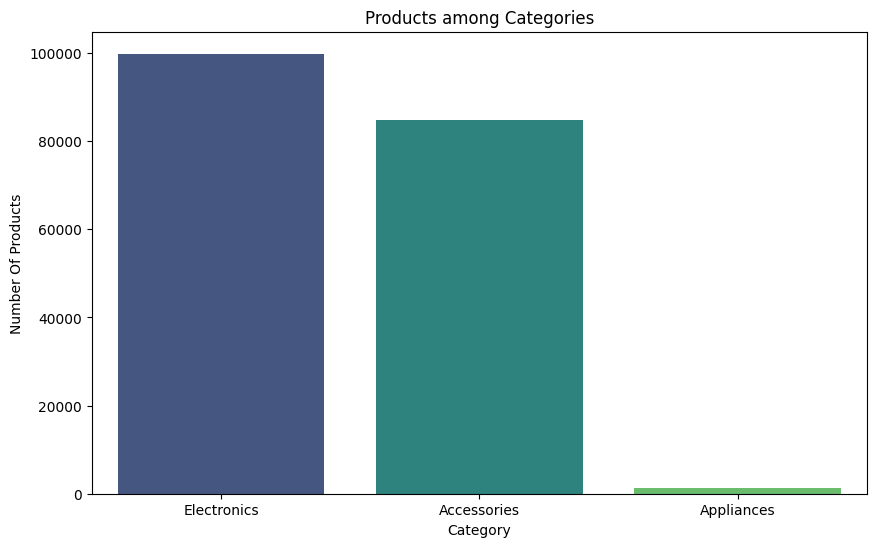

In [39]:
# Runs value counts function to count the number of products in each category and pulls category column to assign to variable category_counts
category_counts = df['category'].value_counts()

# Creates a bar plot using matplotlib and seaborn

# Creates a new figure with the plot size 10 wide 6 tall 
plt.figure(figsize=(10,6))

# Creates the plot using seaborn
# x-axis represents category (index)
# y-axos represents number of products sold in each catagory (values)
# and implements a 'palette' parameter that sets the color scheme
sns.barplot(x=category_counts.index, y=category_counts.values, palette= 'viridis')

# Adds title to plot
plt.title('Products among Categories')
# Adds a label to x-axis
plt.xlabel('Category')
# Adds a label to y-axis
plt.ylabel('Number Of Products')

#shows plot
plt.show()


c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


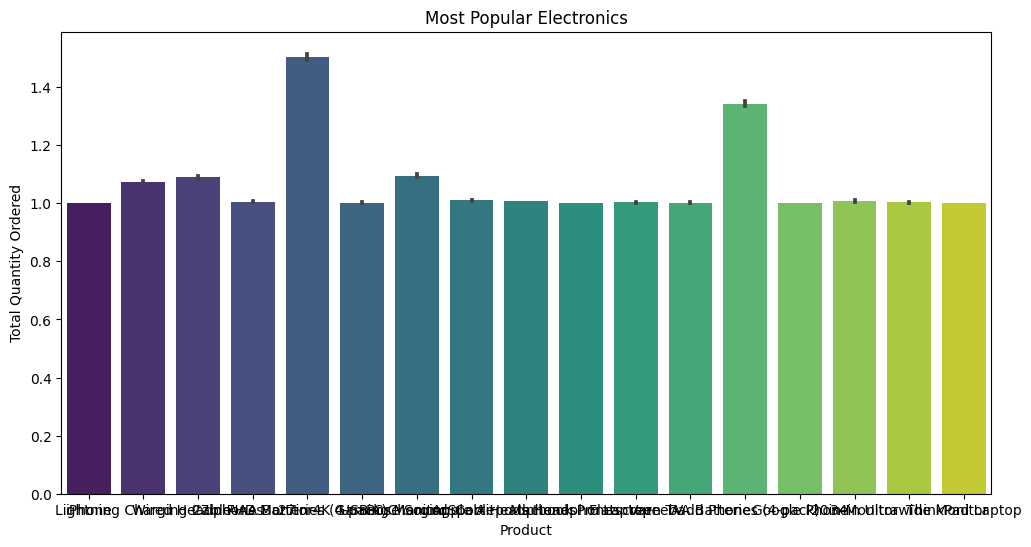

c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlg48\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


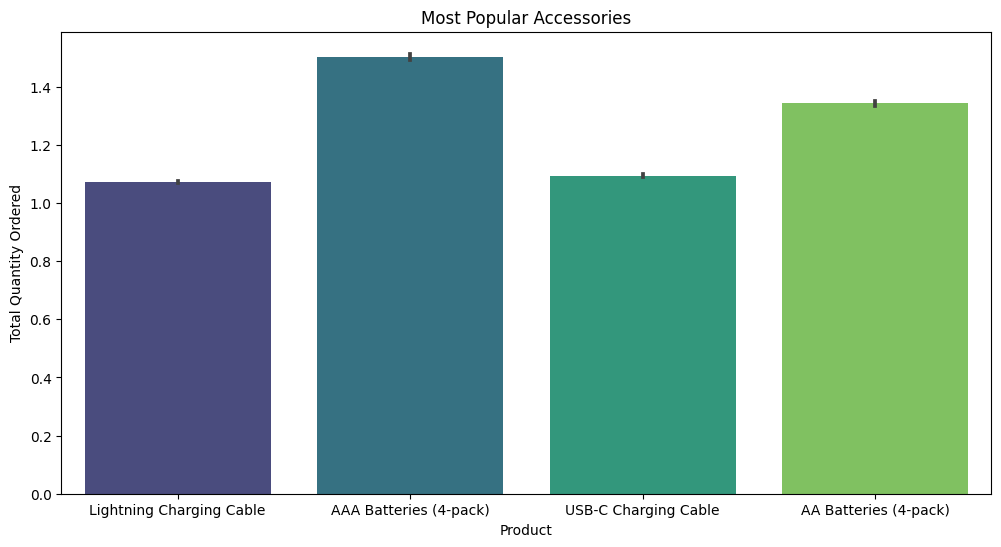

In [41]:
# Creates a New Filtered Data Frame to only include rows with 'Electronics' and 'accessories'
filtered_df = df[df['category'].isin(['Electronics', 'Accessories'])]

# Creates plot Using Seaborn and Matplotlib most popular electronics similar to last Visual
plt.figure(figsize=(12,6))
# Uses Seaborn to create barplot where x:'product' and y='quantity_ordered from filtered data variable for ONLY Electronics
sns.barplot(x='product', y='quantity_ordered', data=filtered_df, palette = 'viridis')
#Titles the Bar Plot & labels x & y axis
plt.title('Most Popular Electronics')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')

#Shows Most Popular Electronics Plot
plt.show()

#### NEED TO MAKE MOST POPULAR ELECTRONICS X-BAR MORE VISABLE && NEED TO FIX: want Chart to display the most ordered Items in each category

accessories_df = filtered_df[filtered_df['category'] == 'Accessories']
# Creates plot Using Seaborn and Matplotlib most popular accessories similar to last Visual
plt.figure(figsize=(12,6))
# Uses Seaborn to create barplot where x:'product' and y='quantity_ordered from filtered data variable for ONLY Electronics
sns.barplot(x='product', y='quantity_ordered', data=accessories_df, palette = 'viridis')
#Titles the Bar Plot & labels x & y axis
plt.title('Most Popular Accessories')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')

#Shows Most Popular Accessories Plot
plt.show()


